In [ ]:
#Assignment 5

Problem Statement1: Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks: 
1. Create a seperate DataFrame with only numeric data by removing the "country"column
2. Scale the data using the Standard Scaler to create a scaled DataFrame
3. Plotting dendograms with the complete linkage method
4. Creating cluster labels using cut tree
5. Perform the 4-Component PCA on DataFrame
6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

country_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
mortality_df = country_df.drop("country",axis=1)
mortality_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
#Scale the data using the Standard Scaler

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(mortality_df)
standard_df = pd.DataFrame(standard_df, columns = list(mortality_df.columns.values))

standard_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


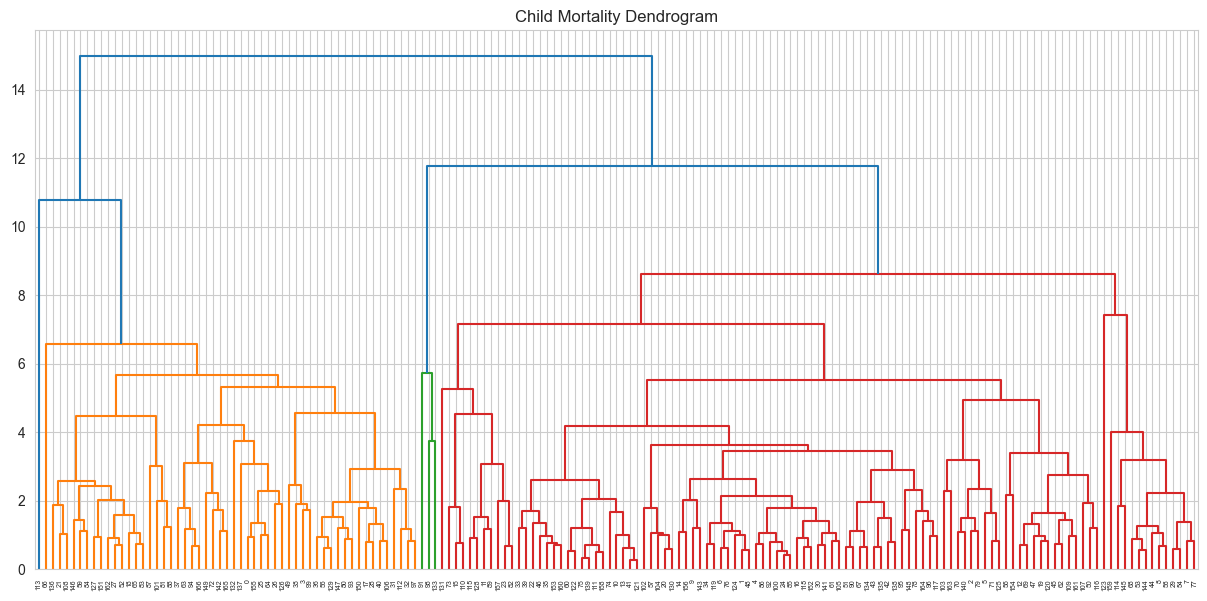

In [19]:
#Plot dendograms with the complete linkage method

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,7))
plt.title("Child Mortality Dendrogram")

dend = sch.dendrogram(sch.linkage(standard_df.values, method="complete"))

In [21]:
#Create cluster labels using cut tree (To separate clusters from dendogram tree)

from scipy.cluster.hierarchy import cut_tree

cluster_label = cut_tree(sch.linkage(standard_df.values, method="complete"), n_clusters=4).reshape(-1, )
cluster_label


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [24]:
mortaility_hier_df = standard_df.copy()
mortaility_hier_df['Hierarchical_Cluster_labels'] = cluster_label
mortaility_hier_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [29]:
#Perform the 4-Component PCA on DataFrame

from sklearn.decomposition import PCA

pca_model = PCA(n_components = 4)
mortality_hier_pca = pca_model.fit_transform(mortaility_hier_df)

In [30]:
pca_model.explained_variance_ratio_

array([0.45883092, 0.16702991, 0.13049828, 0.10821363])

In [35]:
mortality_pca_df = pd.DataFrame(data = mortality_hier_pca
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

mortality_pca_df['Hierarchical_Cluster_labels'] = mortaility_hier_df['Hierarchical_Cluster_labels']
mortality_pca_df.head()

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_labels
0,-3.006985,0.123167,-0.800470,0.925003,0
1,0.480433,-0.599432,-0.197637,-1.202976,1
2,-0.208720,-0.517000,1.326123,-0.752685,1
3,-3.005853,1.655001,1.464063,0.995353,0
4,1.068704,0.135366,-0.137515,-0.863858,1


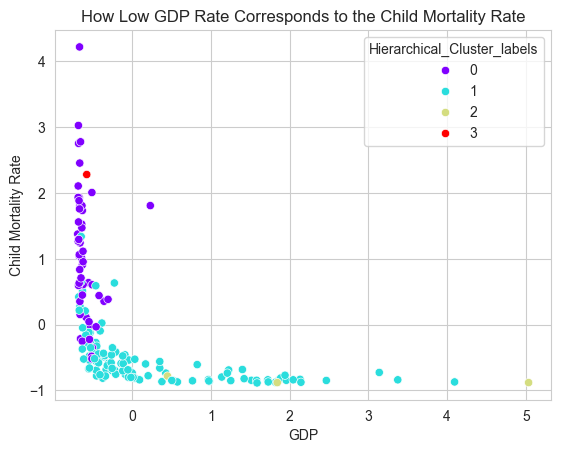

In [42]:
#Analyze how low GDP rate corresponds to the child mortality rate around the world

sns.set_style('whitegrid')
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'Hierarchical_Cluster_labels', data = mortaility_hier_df, palette = "rainbow", legend = "full")
plt.xlabel("GDP")
plt.ylabel("Child Mortality Rate")
plt.title("How Low GDP Rate Corresponds to the Child Mortality Rate")
plt.show()

Problem Statement2: Write a Python program that reads the “Credit Card Customer Data.csv”(provided on LMS) 

The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.

Tasks to be performed: 
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model
8. Observe Cluster behavior with different columns
9. Print Co-ordinates of all centroids and silhouette scores for the final model

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

credit_card_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Credit Card Customer Data.csv")
credit_card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
credit_card_df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
#Drop Unnecessary fields

filtered_df = credit_card_df.drop(['Sl_No','Customer Key'],axis=1)
filtered_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Avg_Credit_Limit
Skew : 2.2


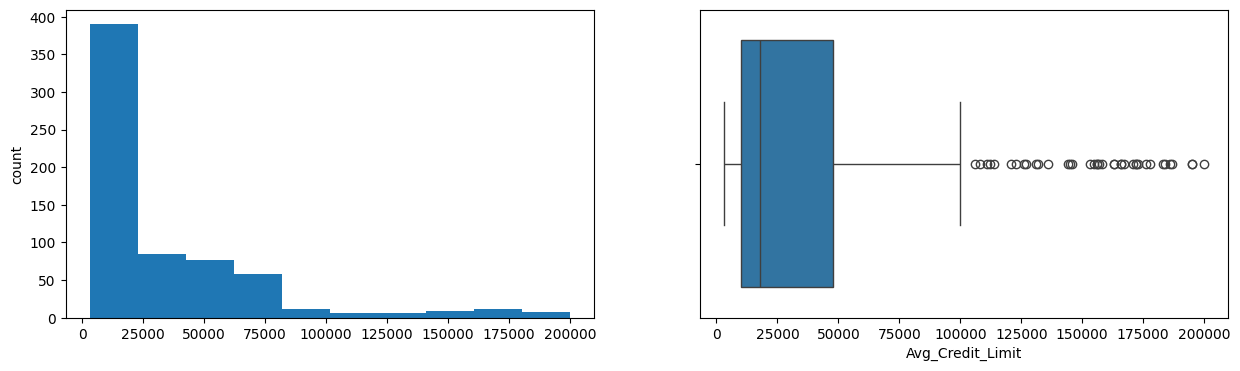

Total_Credit_Cards
Skew : 0.14


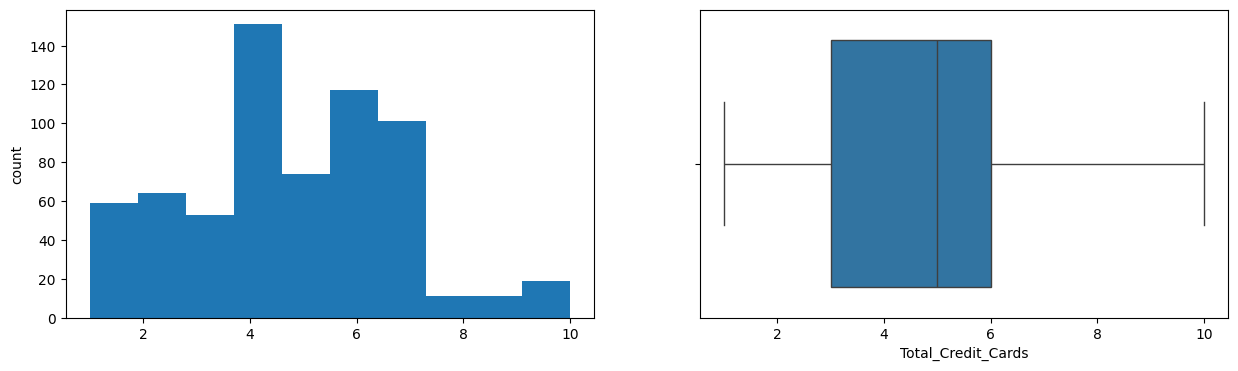

Total_visits_bank
Skew : 0.14


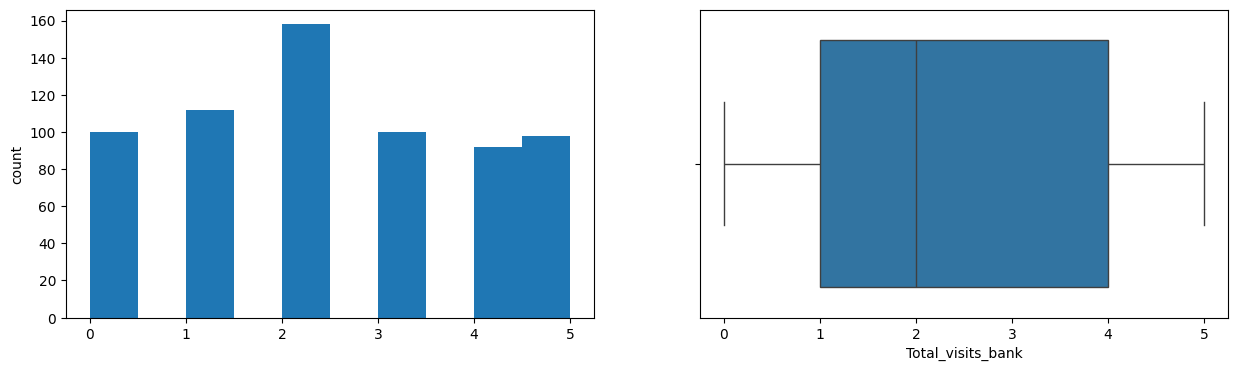

Total_visits_online
Skew : 2.23


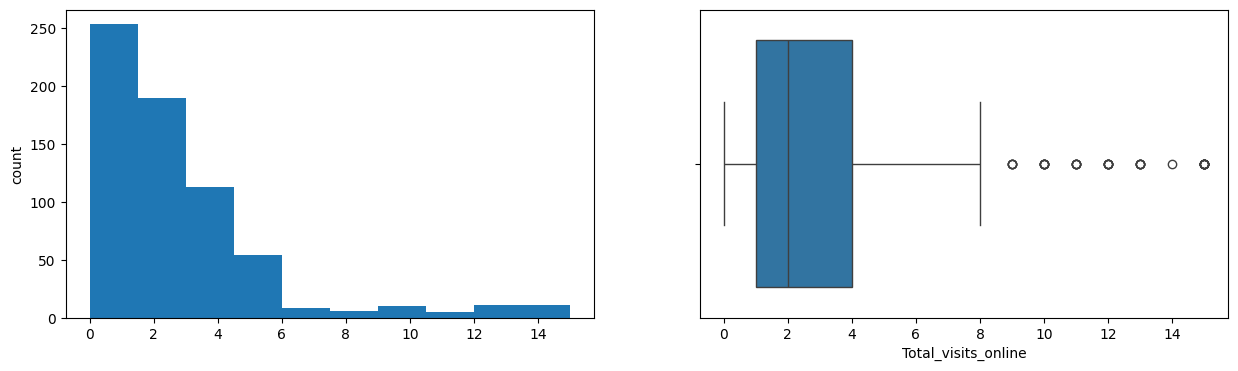

Total_calls_made
Skew : 0.66


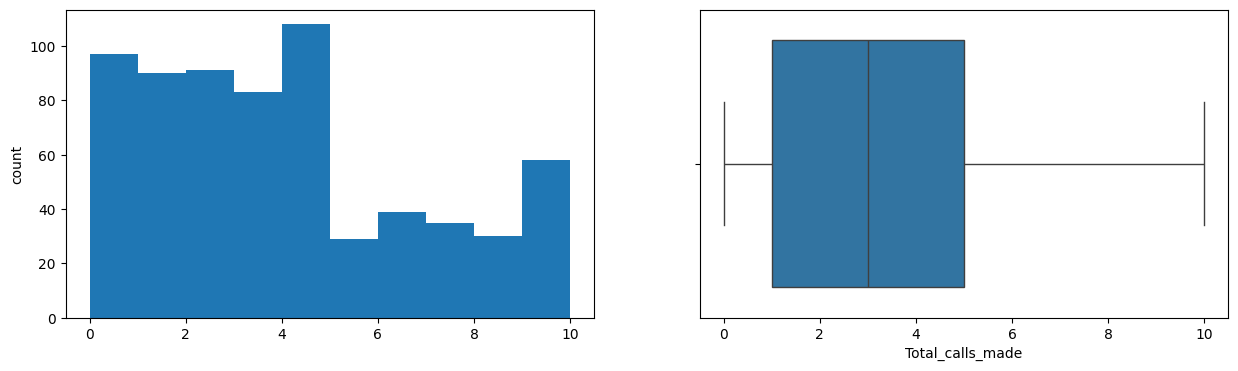

In [8]:
#EDA Univariate Analysis

for col in list(filtered_df.columns.values):
    print(col)
    print('Skew :', round(filtered_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    filtered_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=filtered_df[col])
    plt.show()

<Figure size 2000x1200 with 0 Axes>

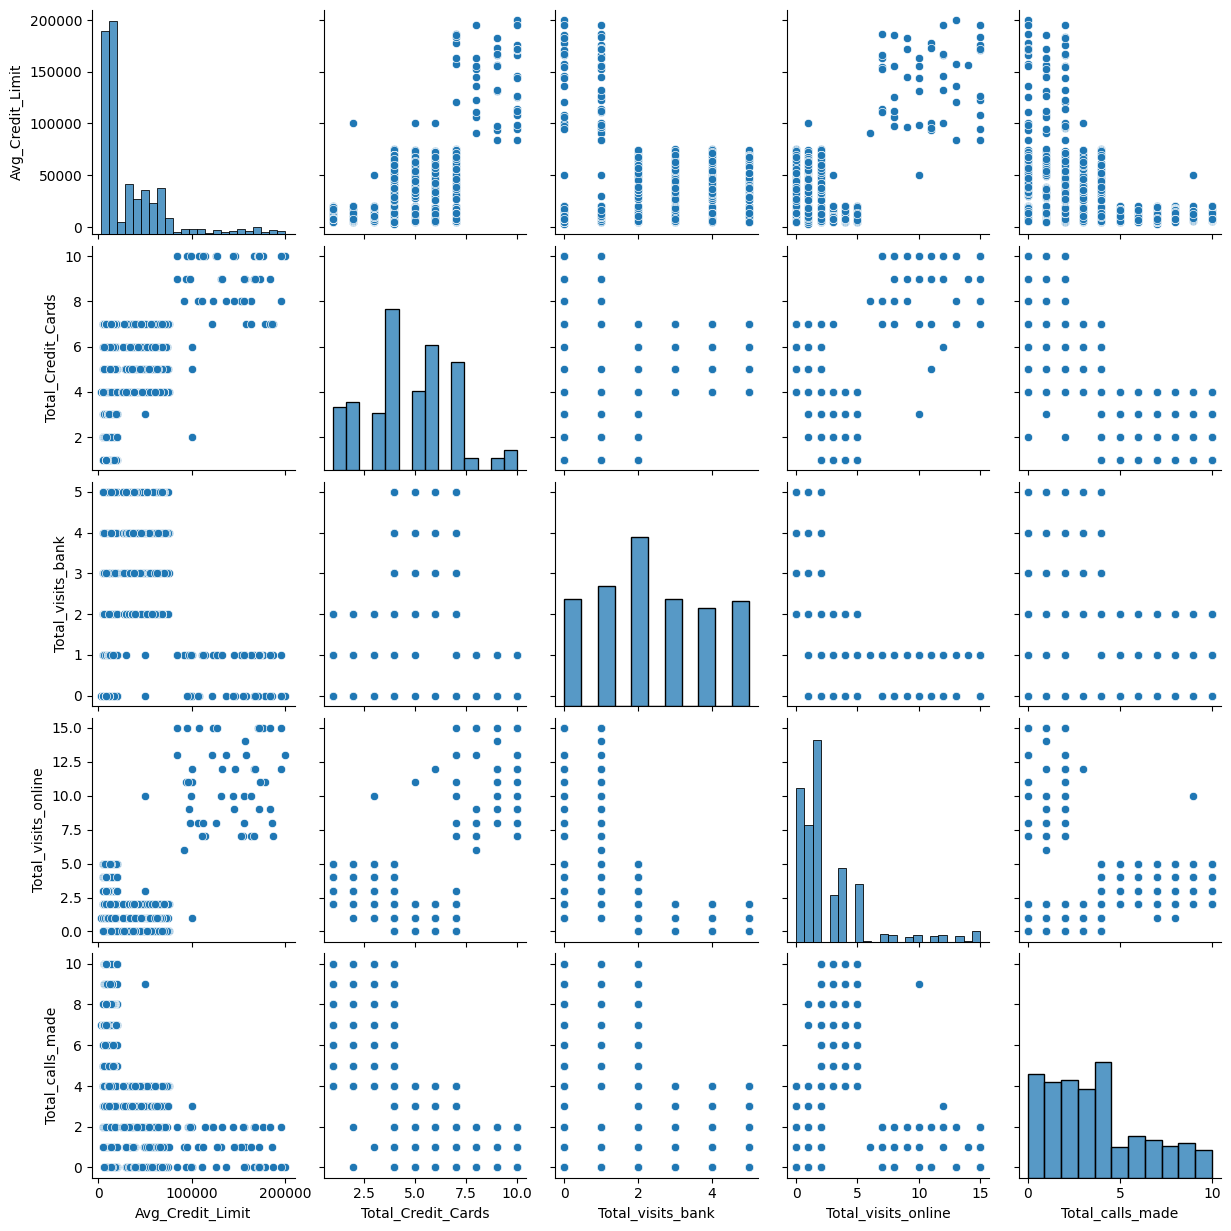

In [11]:
##EDA Bivariate Analysis

plt.figure(figsize=(20,12))
sns.pairplot(filtered_df)
plt.show()

In [13]:
#Standardize the whole dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(filtered_df)
standard_df = pd.DataFrame(standard_df, columns = list(filtered_df.columns.values))

standard_df.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537
659,3.522245,1.982253,-1.473731,3.202298,-0.553005


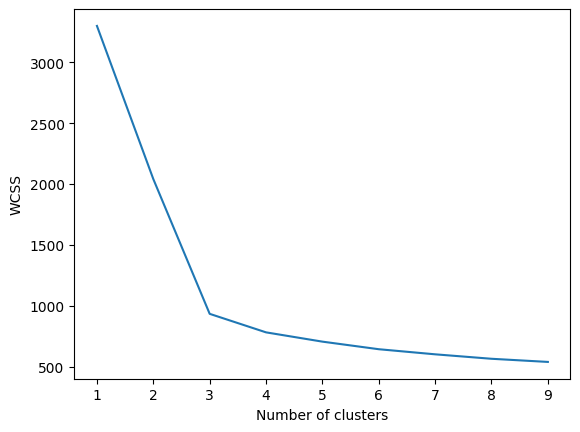

In [15]:
#Find the within-cluster sum of square (to find the optimum number of clusters)

from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(standard_df)
    wcss.append(kmeans1.inertia_)

plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [16]:
#WCSS Value for Optimal Number of Clusters

kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(standard_df)
print("WCSS at optimal number of clusters=",kmeans1.inertia_)

WCSS at optimal number of clusters= 933.0437490000535


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

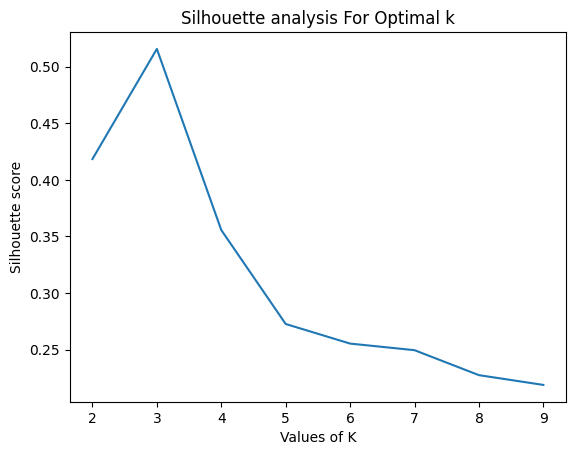

In [20]:
#Find silhouette score
#The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation)

from sklearn.metrics import silhouette_score

silhouette_avg = []
for num_clusters in range(2,10):
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(standard_df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(standard_df, cluster_labels))
    
plt.plot(range(2,10),silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')


In [23]:
#Silhouette Score for Optimal Number of Clusters

kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(standard_df)
cluster_labels = kmeans1.labels_
print("Silhouette Score at optimal number of clusters = %.3f"%(silhouette_score(standard_df, cluster_labels)))

Silhouette Score at optimal number of clusters = 0.516


In [24]:
#Print Co-ordinates of all centroids

kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(standard_df)

print("Centroid co-ordinates of the 3 clusters are:")
print(kmeans_model.cluster_centers_)

Centroid co-ordinates of the 3 clusters are:
[[-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]


In [25]:
#Observe Cluster behavior with different columns

standard_df["Cluster labels"] = kmeans_model.labels_
standard_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


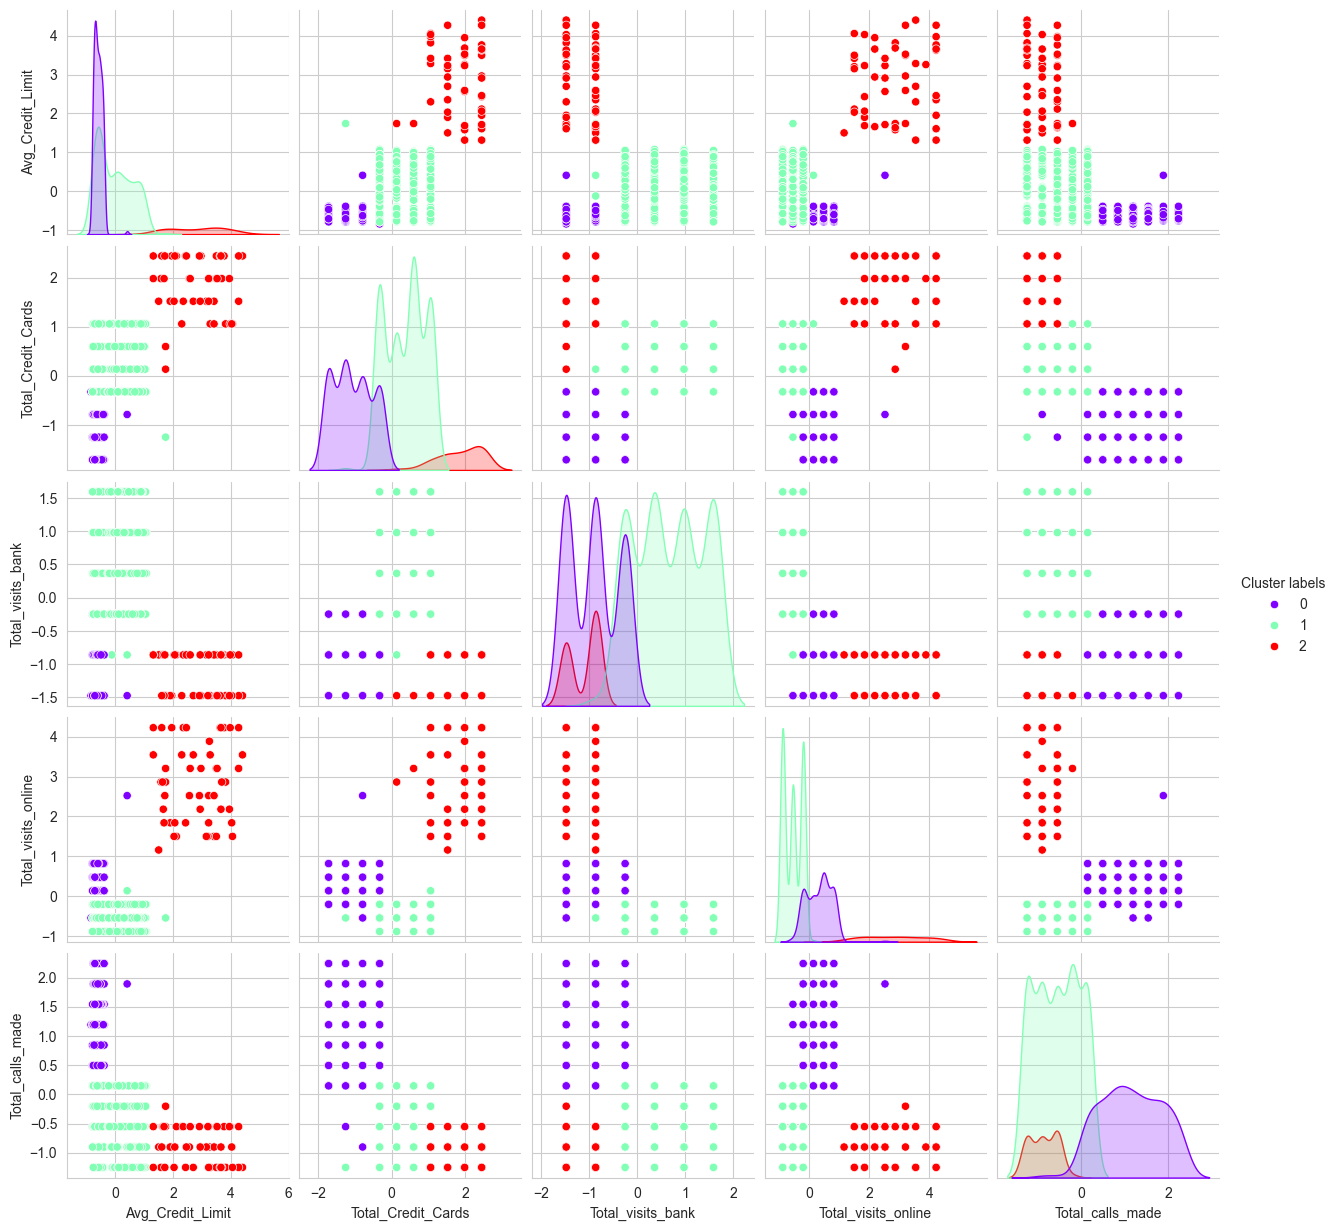

In [27]:
sns.set_style('whitegrid')
sns.pairplot(standard_df,hue='Cluster labels',
           palette='rainbow')
plt.show()

Problem Statement 3: DBSCAN Clustering

Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

1. Find the correlation among the all the columns and drop the column/s with the least correlation
2. Encode the "Gender" column using get_dummies() function
3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
4. Print the size of each cluster and also the size of outliers' cluster
5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

In [26]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

mall_customer_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Mall_Customers.csv")
mall_customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
mall_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
cat_cols = mall_customer_df.select_dtypes(include=['object']).columns.tolist()
num_cols = mall_customer_df.select_dtypes(include=np.number).columns.tolist()

In [29]:
corr_matrix = mall_customer_df.loc[:,num_cols].corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [30]:
one_hot_encoded_df = pd.get_dummies(mall_customer_df, columns = cat_cols) 
one_hot_encoded_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


In [31]:
#Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

from sklearn.cluster import DBSCAN

X_train = one_hot_encoded_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)

dbscan_df = X_train.copy()

dbscan_df['Cluster labels'] = clustering.labels_ 

dbscan_df

,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [36]:
#Check size of each cluster and also the size of outliers' cluster

dbscan_df['Cluster labels'].value_counts()

Cluster labels
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64

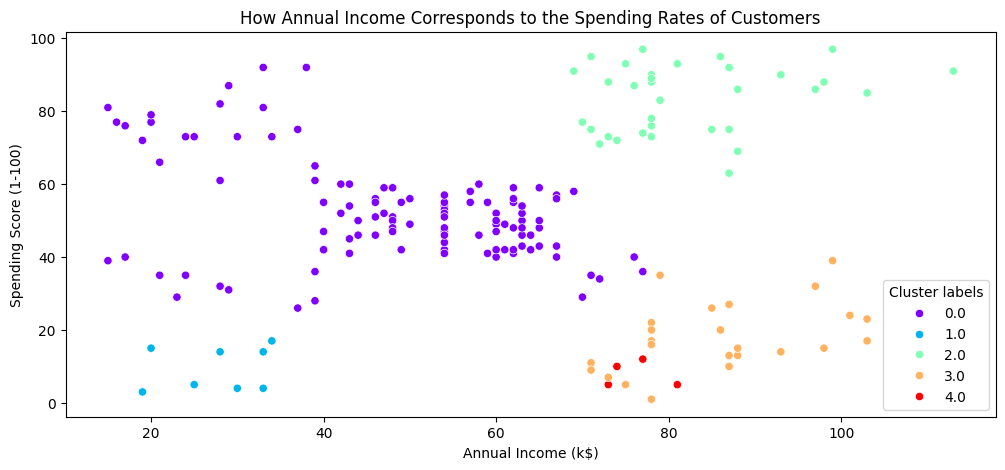

In [37]:
#Using a scatter plot shows how annual income corresponds to the spending rates of customers

plt.figure(figsize=(12,5))
sns.scatterplot(x=dbscan_df['Annual Income (k$)'],y=dbscan_df['Spending Score (1-100)'],data=dbscan_df[dbscan_df['Cluster labels'] != -1],hue='Cluster labels', palette='rainbow', legend='full')
plt.title('How Annual Income Corresponds to the Spending Rates of Customers')
plt.show()

Problem Statement4: Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame. 

The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. 

Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.

Tasks to be performed:
1. Install mlxtend library for further process
2. Load the Groceries data.csv data into a Data frame
3. Print customer data where the member number is 1001
4. Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)
5. Drop unnecessary columns like "month","day","year","day_of_week"
6. Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.
7. Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%
8. Generating the rules with their corresponding support, confidence, and lift
9. Filtering out the values with lift > = 1 and confidence > = 0.5

In [38]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

grocery_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Groceries data.csv")
grocery_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [39]:
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [40]:
#Print customer data where the member number is 1001

grocery_df[grocery_df['Member_number']==1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [41]:
#Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

grocery_df['item count'] = 1
grocery_df

,Member_number,Date,itemDescription,year,month,day,day_of_week,item count
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,1
38761,2022,2014-02-23,candy,2014,2,23,6,1
38762,1097,2014-04-16,cake bar,2014,4,16,2,1
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,1


In [42]:
#Drop unnecessary columns like "month","day","year","day_of_week"

grocery_df_filtered = grocery_df.drop(["month","day","year","day_of_week"],axis=1)
grocery_df_filtered

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-03-12,fruit/vegetable juice,1


In [61]:
#Create a new data frame where all data is grouped by member id and items they bought and set their value as item count

grocery_df_grp = grocery_df_filtered.groupby(['Member_number','itemDescription'])[['item count']].count().reset_index()

grocery_df_grp.head(50)

,Member_number,itemDescription,item count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
5,1000,salty snack,1
6,1000,sausage,2
7,1000,semi-finished bread,1
8,1000,soda,1
9,1000,whole milk,2


In [63]:
basket = grocery_df_grp.pivot(index='Member_number', columns='itemDescription', values='item count').fillna(0)

basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%

#Install mlxtend package
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#There are a lot of zeros in the data but we also need to make sure any positive values are converted to 1 and anything less than 0 is set to 0
def encode_units(x):
    if x <= 0.0:
        return 0
    if x >= 1.0:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

C:\Users\827180\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
1,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988,0.273711
2,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450,0.229175
3,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969,0.181695
4,(rolls/buns),(bottled water),0.349666,0.213699,0.079271,0.226706,1.060863,0.004548,1.016820,0.088219


In [72]:
#Filtering out the values with lift > = 1 and confidence > = 0.5

rules[(rules['lift']>=1) & (rules['confidence']>=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
10,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
18,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
20,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775,0.133115
38,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
42,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572,0.129931
44,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239,0.122020
54,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
66,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
